In [5]:
import numpy as np 
import torch 
from keras.datasets import mnist
import sklearn
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import time

from sklearn.neighbors import KNeighborsClassifier

In [6]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print("No of training datapoints:{}\nNo of Test datapoints:{}".format(len(xtrain),len(xtest)))

11493376/11490434 [==============================] - 1s 0us/step
No of training datapoints:60000
No of Test datapoints:10000


Text(0.5, 1.0, '3')

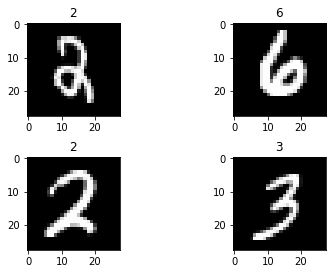

In [7]:
#visualisations
rand_idx = random.sample(range(60000), 4)

f, axes=plt.subplots(2,2)

f.tight_layout(pad=2.0)

#showing images with gaussian noise
axes[0,0].imshow(xtrain[rand_idx[0]],cmap="gray")
axes[0,0].set_title(ytrain[rand_idx[0]])
axes[1,0].imshow(xtrain[rand_idx[1]],cmap='gray')
axes[1,0].set_title(ytrain[rand_idx[1]])

#showing images with speckle noise
axes[0,1].imshow(xtrain[rand_idx[2]],cmap='gray')
axes[0,1].set_title(ytrain[rand_idx[2]])
axes[1,1].imshow(xtrain[rand_idx[3]],cmap="gray")
axes[1,1].set_title(ytrain[rand_idx[3]])

In [9]:
# An utility function to flatten an image from (H, W, C) to (1, H*W*C)
def flatten(x):
  return np.reshape(x, (1, -1))
  
# An utility function to unflatten an image from (1, H*W*C) to (H, W, C)
def deflatten(x, h=28, w=28, c=1):
  return np.reshape(x, (h, w, c))


In [10]:
len_train = xtrain.shape[0]
len_test = xtest.shape[0]

In [11]:
# Convert train examples from [N, 28, 28] to [N, 784]

trainimgs = np.zeros((len_train, 784))
testimgs = np.zeros((len_test, 784))

for idx in tqdm(range(len_train)):
  trainimgs[idx, :] = flatten(xtrain[idx])

# Convert test examples from [N, 28, 28] to [N, 784]

testimgs = np.zeros((len_test, 784))

for idx in tqdm(range(len_test)):
  testimgs[idx, :] = flatten(xtest[idx])

100%|██████████| 10000/10000 [00:00<00:00, 251718.15it/s]


In [12]:
#initialising the model
params = {
  "algorithm": 'auto',
  "metric": 'minkowski',
  "n_neighbors": 3,     
}


knn = KNeighborsClassifier(**params)

In [13]:
#fitting the model
start_time = time.time()
knn.fit(trainimgs, ytrain)
print(f"Time taken to fit data: {time.time() - start_time} s")

Time taken to fit data: 33.950737714767456 s


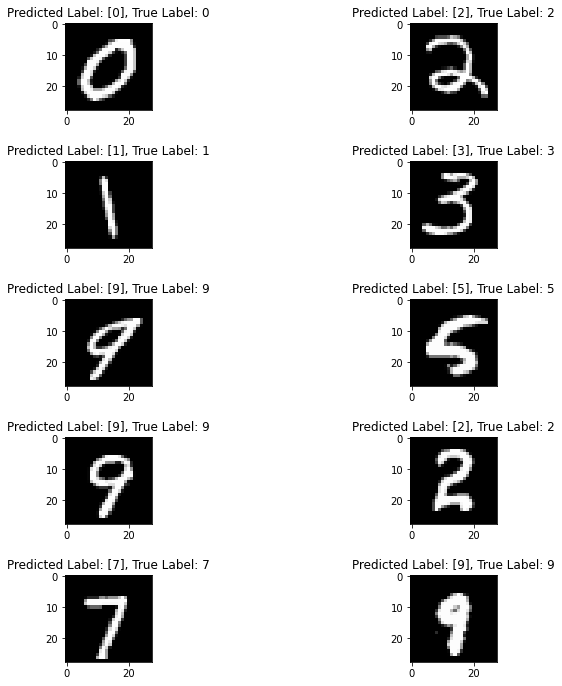

In [14]:
#testing the model
rand_idx = random.sample(range(10000), 10)

f, axes=plt.subplots(5, 2)
f.set_figheight(10)
f.set_figwidth(10)
f.tight_layout(pad=3)

col = 0
rows = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
for counter, idx, row in zip(range(10), rand_idx, rows):
  
  if counter % 2 != 0:
    col = 1
  else:
    col = 0

  pred = knn.predict(testimgs[idx].reshape(1, -1))
  label = ytest[idx]
  axes[row, col].imshow(xtest[idx], cmap='gray')
  axes[row , col].set_title(f"Predicted Label: {pred}, True Label: {label}")